In [167]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 
import seaborn as sns 
sns.set_style('darkgrid')
from matplotlib import style
%matplotlib inline
from statistics import mean


# ML 

%pip install scikit-learn  --upgrade --force
%pip install xgboost
%pip install lightgbm

from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, roc_auc_score # use for classicfictation score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (TimeSeriesSplit, KFold, train_test_split, StratifiedKFold, GroupKFold, StratifiedGroupKFold)

import lightgbm as lgb


df01= pd.read_csv("MasterCapStoneFile_01.csv" )

#check for NULL values
df01.isnull().sum()




  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: scikit-learn
    Found existing

HD_M_Value      0
HD_M_US         0
HD_M_REL_US     0
HBP_M_Value     0
HBP_M_US        0
HBP_M_REL_US    0
HC_M_Value      0
HC_M_US         0
HC_M_REL_US     0
OB_M_Value      0
OB_M_US         0
OB_M_REL_US     0
DB_M_Value      0
DB_M_US         0
DB_M_REL_US     0
Target_Value    0
dtype: int64

Histrograms =  show the frequency of distribution. 

## ML 

##### Dividing the dataset into independent and dependent features.

In [168]:
df_01 = df01.drop(columns=[ 'HD_M_US', 'HD_M_REL_US',  'HBP_M_US','HBP_M_REL_US',  'HC_M_US', 'HC_M_REL_US', 
'OB_M_US', 'OB_M_REL_US',  'DB_M_US', 'DB_M_REL_US'])

#### Below is the dataframe for the ML models:

In [169]:
# Removing outliers by query for the values to keep

df = df_01.query("`OB_M_Value` >=0 & `OB_M_Value` <50 & \
                  `DB_M_Value` >0 & `DB_M_Value` <19  & \
                  `HD_M_Value` <9  & `HD_M_Value` >1  & \
                  `HBP_M_Value` >13 & `HBP_M_Value` <45 & \
                  `HC_M_Value` >22 & `HC_M_Value` <41  & \
                  `Target_Value` >1 & `Target_Value` < 5" )
#print(df)

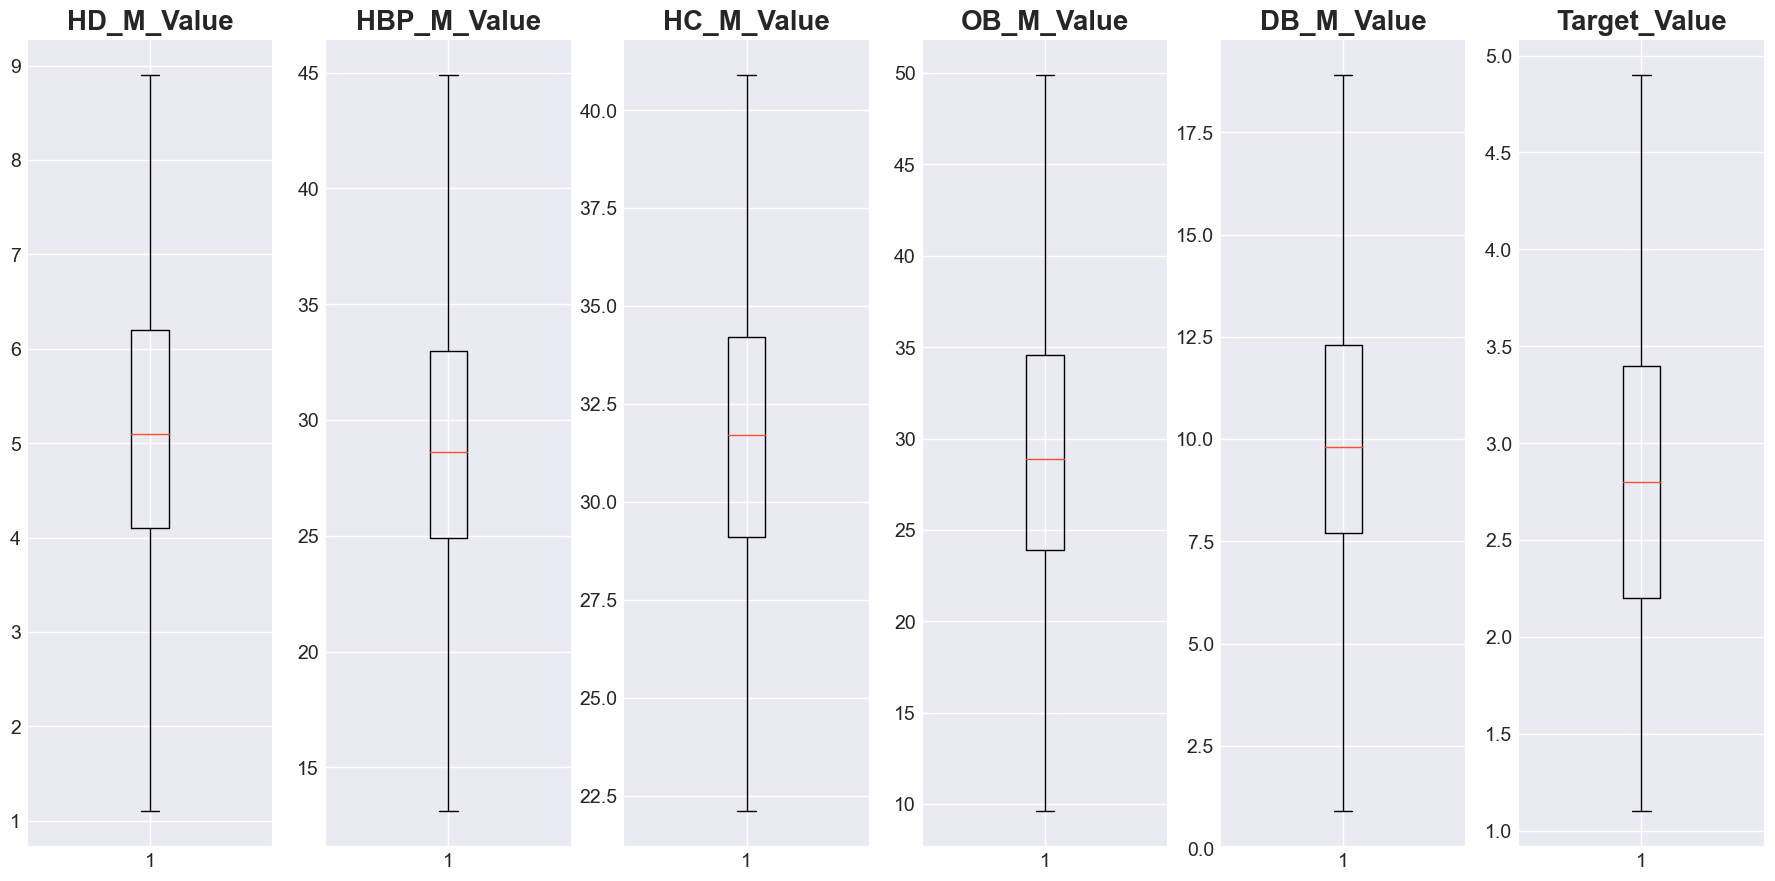

In [170]:
#Subplot after outliers are dropped.

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle) # exclude row#0 and #1
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.show()

ML Analysis - LinearRegression Model

In [171]:
X=df.iloc[:, 1:] # Independent features.
y=df.iloc[:, -1]  # dependent feature (Stroke).

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


ML Analyzing using - Linear Regression Model.

In [174]:
# Fit/load into a model

modelReg = LinearRegression ()
modelReg.fit(X_train,y_train)
#y_test

LinearRegression()

In [175]:
y_pred = modelReg.predict(X_test) # predict y on X.
modelReg.score(X_test,y_test) # See the performance (diff of actual value(y_test) from predicted X_test)



1.0

In [176]:
# plot to compare the differenct in these two values.
# Actual Values(stroke) y_test
#print(y_test)

#Predicted X Values to test against Y(Target_Value).
#print(y_pred)

Predicted Values save to df - Linear Regression 

In [177]:
# Creating new df for the results
pred_y_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_df[0:5]


,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
22760,4.8,4.8,0.000000e+00,0.000000e+00,0.000000e+00
5931,1.3,1.3,4.440892e-16,1.972152e-31,3.416071e-14
7564,3.3,3.3,4.440892e-16,1.972152e-31,1.345725e-14
22566,3.3,3.3,0.000000e+00,0.000000e+00,0.000000e+00
5136,4.0,4.0,0.000000e+00,0.000000e+00,0.000000e+00


In [178]:
print(modelReg.score(X_test,y_test))
#print(r2_score(y_test,y_pred)) # the accuracy of the prediction and the different is the errors(SSE).
print('Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  

print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('MAE = ', mean_absolute_error(y_pred,y_test))
#print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error

#==============================================================
Tot_Err = pred_y_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

1.0
Score 1.0
r2:1.0  
mae:2.1432290042736455e-16  
MAE =  2.1432290042736455e-16
MAD =  2.1432290042736455e-16
MSE =  1.0688341639229789e-31
MAPE =  8.260338270051489e-15


In [179]:
#model_ranks=pd.Series(modelReg.feature_importances_,index=X_train.columns,name='Importance')
#ax=model_ranks.plot(kind='barh')

## K-Fold CV on Linear Regression 

In [219]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelReg, X_train,y_train, scoring='r2', cv=10)
scores
#print(np.mean(scores))

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


In [224]:
# printing the scores on the test dataset.
from sklearn.model_selection import cross_val_predict
pred_values = cross_val_predict(modelReg, X_test,y_test)
print('Predicted values:', pred_values)

#  Test - 10 fold CV on the test data.
scores_test = cross_val_score(modelReg, X_test, y_test, cv=10)
print('Accuracy on testing values:', scores_test)
#print(np.mean(scores_test))

Predicted values: [2.4 2.6 2.4 ... 3.4 1.5 1.8]
Accuracy on testing values: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [218]:
#  Test - 10 fold CV on the test data.
scores_test = cross_val_score(modelReg, X_test, y_test, cv=10)
print(scores_test)
print(np.mean(scores_test))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


XGBRegessor ML Model

In [180]:
#modelReg = LinearRegression ()
modelXGB= XGBRegressor()
modelXGB.fit(X_train,y_train)
y_pred = modelXGB.predict(X_test) # Predicting X(all factors).
modelXGB.score(X_test,y_test) # The performance.


0.9999999995527518

In [181]:

#-=================
# Creating new df - holding values for Decision Tree

pred_y_XGB_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_XGB_df [0:5]


,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
22760,4.8,4.799962,3.795624e-05,1.440676e-09,0.000791
5931,1.3,1.300025,2.474785e-05,6.124560e-10,0.001904
7564,3.3,3.300002,2.098083e-06,4.401954e-12,0.000064
22566,3.3,3.300002,2.098083e-06,4.401954e-12,0.000064
5136,4.0,4.000000,4.768372e-07,2.273737e-13,0.000012


In [182]:

print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))

print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error



#==============================================================
Tot_Err = pred_y_XGB_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_XGB_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_XGB_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_XGB_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

from sklearn.metrics import mean_squared_error

print('MSE = ', mean_squared_error(pred_y_XGB_df['Actual Stroke Value'], pred_y_XGB_df['Predicted Value'] ) )

#SSE - sum of sqr, the goal is to reduced SSE (compare to SSE before removing the outliers)
print("SSE = ", pred_y_XGB_df['Sqr'].sum())

Score 0.9999999995527518
r2:0.999999999552742  
mae:8.363954861597153e-06  
mean_absolute_error =  8.363954861597153e-06
mean_absolute_percentage_error =  3.3008562515170868e-06
MAD =  8.363954861597153e-06
MSE =  3.2010066999274014e-10
MAPE =  0.00033009100631177095
MSE =  3.2010066999274014e-10
SSE =  1.169007646813487e-06


## K-Fold CV on XGBRegessor ML Model

In [225]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelXGB, X_train,y_train, scoring='r2', cv=10)
scores
#print(np.mean(scores))

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


ML Analyzing using - Decision Tree Model.

In [183]:


modelDT= DecisionTreeRegressor()
modelDT.fit(X_train,y_train)
y_pred = modelDT.predict(X_test) # Predicting X(all factors).
modelDT.score(X_test,y_test) # The performance.


1.0

In [184]:
# Creating new df - holding values for Decision Tree

pred_y_DT_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_DT_df[0:5]


,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
22760,4.8,4.8,8.881784e-16,7.888609e-31,1.850372e-14
5931,1.3,1.3,1.998401e-15,3.993608e-30,1.537232e-13
7564,3.3,3.3,2.797762e-14,7.827472e-28,8.478067e-13
22566,3.3,3.3,2.797762e-14,7.827472e-28,8.478067e-13
5136,4.0,4.0,0.000000e+00,0.000000e+00,0.000000e+00


In [185]:
print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))

print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error



#==============================================================
Tot_Err = pred_y_DT_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_DT_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_DT_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_DT_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

Score 1.0
r2:1.0  
mae:1.3587950285449281e-14  
mean_absolute_error =  1.3587950285449281e-14
mean_absolute_percentage_error =  4.941326089791096e-15
MAD =  1.3587950285449281e-14
MSE =  3.2731975005888265e-28
MAPE =  4.941326089791099e-13


In [186]:
from sklearn.metrics import mean_squared_error

print('MSE = ', mean_squared_error(pred_y_DT_df['Actual Stroke Value'], pred_y_DT_df['Predicted Value'] ) )

#SSE - sum of sqr, the goal is to reduced SSE (compare to SSE before removing the outliers)
print("SSE = ", pred_y_DT_df['Sqr'].sum())

MSE =  3.2731975005888265e-28
SSE =  1.1953717272150394e-24


In [ ]:
model_ranks=pd.Series(modelDT.feature_importances_,index=X_train.columns,name='Importance')
ax=model_ranks.plot(kind='barh')

K-Fold on DecisionTree

In [226]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelDT, X_train,y_train, scoring='r2', cv=10)
scores
#print(np.mean(scores))

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


#### ML Analyzing using - RandomForestRegressor Model.

In [188]:


modelRF = RandomForestRegressor(n_estimators=20, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


modelRF.fit(X_train,y_train)
y_pred = modelRF.predict(X_test)
modelRF.score(X_test,y_test)



1.0

In [189]:

pred_y_RF_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_RF_df[0:5]

,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
26444,2.3,2.3,5.329071e-15,2.839899e-29,2.316987e-13
20041,1.1,1.1,2.220446e-16,4.930381e-32,2.018587e-14
5139,3.0,3.0,0.000000e+00,0.000000e+00,0.000000e+00
23397,2.4,2.4,0.000000e+00,0.000000e+00,0.000000e+00
25462,4.1,4.1,7.993606e-15,6.389773e-29,1.949660e-13


In [190]:

print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error
print('MSE', mean_squared_error(y_test,y_pred))

#==============================================================
Tot_Err = pred_y_RF_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_RF_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_RF_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_RF_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

Score 1.0
r2:1.0  
mae:4.885467714933219e-15  
mean_absolute_error =  4.885467714933219e-15
mean_absolute_percentage_error =  1.792945145398906e-15
MSE 4.6847931588827714e-29
MAD =  4.885467714933219e-15
MSE =  4.6847931588827714e-29
MAPE =  1.792945145398906e-13


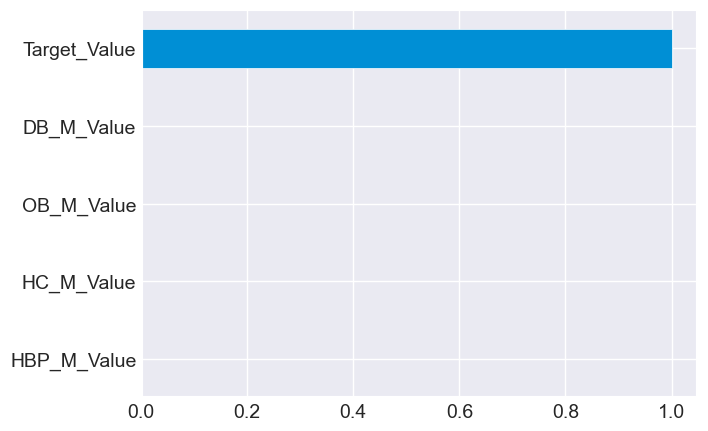

In [191]:
model_ranks=pd.Series(modelRF.feature_importances_,index=X_train.columns,name='Importance')
ax=model_ranks.plot(kind='barh')

### Cross Validation of all models

## k-fold CV  for all models

In [227]:
from sklearn.model_selection import cross_val_score
X=df
y=df.iloc[:, -1]  # dependent feature (Stroke).

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=True)

#modelReg = LinearRegression ()
#modelXGB= XGBRegressor()
#modelDT= DecisionTreeRegressor()
#modelRF = RandomForestRegressor(n_estimators=20, random_state=1)

In [ ]:
All_Modles = []
All_Modles.append(('Linear Reg', LinearRegression ()))
All_Modles.append (('XGBRegessor', XGBRegressor()))
All_Modles.append(('DecisionTree', DecisionTreeRegressor()))
All_Modles.append(('RandomForest', RandomForestRegressor()))
print(All_Modles)

In [233]:
results = dict()
for name, CV_Modles in All_Modles:
    kfold = KFold(n_splits=10, random_state=None)
    scores = cross_val_score(CV_Modles, X_train,y_train, scoring='r2', cv=10)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    
print()

1.00 accuracy with a standard deviation of 0.00
1.00 accuracy with a standard deviation of 0.00
1.00 accuracy with a standard deviation of 0.00
1.00 accuracy with a standard deviation of 0.00

